## Author dectship - Clean Data

In [36]:
import pandas as pd
import nltk
import plotly.plotly as py
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [37]:
lyricsOne = pd.read_csv('./lyrics.csv')#larger One
lyricsTwo = pd.read_csv('./songdata.csv')#smaller One

### EDA for the larger one dataset

In [38]:
lyricsOne.columns

Index(['index', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')

In [39]:
lyricsOne[:5]

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [40]:
len(list(lyricsOne.artist.unique()))

18231

In [41]:
len(lyricsOne.song.unique())

250473

In [42]:
lyricsOne.artist.value_counts()[:10]

dolly-parton        755
american-idol       700
elton-john          680
b-b-king            667
chris-brown         655
eddy-arnold         628
barbra-streisand    624
ella-fitzgerald     623
bob-dylan           614
david-bowie         599
Name: artist, dtype: int64

In [43]:
lyricsOne.artist.value_counts()[-10:]

alex-yenza                    1
anthony-faulkner              1
aya-rl                        1
christian-falk                1
beverley-ely                  1
frederick-daniel              1
band-ja-nai-mon               1
academia-operacion-triunfo    1
eddie-and-the-cruisers        1
andrew-sisters                1
Name: artist, dtype: int64

In [44]:
s = lyricsOne['artist'].value_counts()
new = pd.DataFrame({'artist':s.index, 'Count':s.values})
# py.iplot(new, filename = 'basic-bar')

In [ ]:
new.describe()

In [ ]:
new[new['Count'] <= 6].count()

In [ ]:
lyricsOne.artist.value_counts().hist()

In [ ]:
# plt.hist(lyricsOne['artist'], log=True) 

From the plot and the description, we can see an long-tail. Many artist just have roughly 10 songs in the dataset.

In [ ]:
del new 
del s

### EDA for the smaller one dataset

In [45]:
lyricsTwo[:5]

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [46]:
len(list(lyricsTwo.artist.unique()))

643

In [47]:
len(lyricsTwo.song.unique())

44824

In [48]:
lyricsTwo.artist.value_counts()[:10]

Donna Summer        191
Gordon Lightfoot    189
George Strait       188
Bob Dylan           188
Loretta Lynn        187
Reba Mcentire       187
Alabama             187
Cher                187
Dean Martin         186
Chaka Khan          186
Name: artist, dtype: int64

In [49]:
lyricsTwo.artist.value_counts()[-10:]

Various Artists    3
Eppu Normaali      3
Xavier Naidoo      3
Exo-K              2
Ungu               2
Zazie              2
Zoe                1
X-Treme            1
U-Kiss             1
Zed                1
Name: artist, dtype: int64

In [ ]:
s = lyricsTwo['artist'].value_counts()
new = pd.DataFrame({'artist':s.index, 'Count':s.values})
# py.iplot(new, filename = 'basic-bar')

In [ ]:
new.describe()

In [ ]:
new[new['Count'] <= 100].count()

In [ ]:
lyricsTwo.artist.value_counts().hist()

### Combine and deduplication

In [ ]:
lyricsOne.columns

In [ ]:
lyricsTwo.columns

In [ ]:
lyricsOne = lyricsOne[['song', 'lyrics', 'artist']]

In [ ]:
lyricsTwo = lyricsTwo[['song', 'text', 'artist']].rename(columns={'song': 'song', 'text': 'lyrics', 'artist':'artist'})

In [ ]:
lyricsTwo.columns

In [ ]:
len(lyricsOne)

In [ ]:
len(lyricsTwo)

In [ ]:
len(pd.concat([lyricsOne, lyricsTwo]))

In [ ]:
362237 + 57650

In [ ]:
lyrics = pd.concat([lyricsOne, lyricsTwo])
del lyricsOne
del lyricsTwo

In [ ]:
lyrics[:20]

### Clean stopwords and generate wordbag

In [ ]:
rawText = list(lyrics['lyrics'])

In [ ]:
rawSample = rawText[:20]

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [ ]:
def remove_control_characters(s):
    s = str(s)
    temp =  []
    for ch in s:
        if unicodedata.category(ch)[0]!="C":
            temp.append(ch)
        else:
            temp.append(' ')
    #"".join(ch for ch in s if unicodedata.category(ch)[0]!="C" else ' ')
    return "".join(temp)

def toWordBag(s):
    return " ".join([x.lower() for x in nltk.word_tokenize(s) if x not in stopwords and x.isalpha()])

In [ ]:
del wordBags
wordBags = []
wordBags

In [ ]:
%%time
ct = 0
for rText in rawText:
    
    wordBags.append(toWordBag(remove_control_characters(rText)))
    ct += 1
    if ct % 10000 == 0: print(ct)

In [ ]:
len(wordBags)

In [ ]:
len(rawText)

In [ ]:
lyrics['wordBag'] = wordBags

In [ ]:
lyrics[:10]

### WriteBack to local 

In [ ]:
lyrics.to_csv('wordBag.csv', sep='\t', index = False)

### AFTER GENERATING WORDBAG

In [2]:
setWithWordBag = pd.read_csv('./wordBag.csv', sep = '\t')

In [4]:
setWithWordBag[:10]

,song,lyrics,artist,wordBag
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",beyonce-knowles,oh baby you know i gon na cut right chase some...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",beyonce-knowles,playin everything easy like seem sure still wa...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,beyonce-knowles,if search for tenderness it hard find you love...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",beyonce-knowles,oh oh oh i oh oh oh i verse if i wrote book st...
4,black-culture,"Party the people, the people the party it's po...",beyonce-knowles,party people people party popping sitting arou...
5,all-i-could-do-was-cry,I heard\nChurch bells ringing\nI heard\nA choi...,beyonce-knowles,i heard church bells ringing i heard a choir s...
6,once-in-a-lifetime,This is just another day that I would spend\nW...,beyonce-knowles,this another day i would spend waitin right on...
7,waiting,"Waiting, waiting, waiting, waiting\nWaiting, w...",beyonce-knowles,waiting waiting waiting waiting waiting waitin...
8,slow-love,[Verse 1:]\nI read all of the magazines\nwhile...,beyonce-knowles,verse i read magazines waiting around said cou...
9,why-don-t-you-love-me,"N-n-now, honey\nYou better sit down and look a...",beyonce-knowles,honey you better sit look around must bumped y...


In [11]:
artistwordBag = setWithWordBag[['artist', 'wordBag']]

In [12]:
artistwordBag.describe()

,artist,wordBag
count,419887,322989
unique,18874,289909
top,dolly-parton,instrumental
freq,755,3754


In [17]:
artistwordBag.artist.value_counts().describe()

count    18874.000000
mean        22.246848
std         43.626960
min          1.000000
25%          2.000000
50%          9.000000
75%         21.000000
max        755.000000
Name: artist, dtype: float64

In [23]:
artistwordBag.groupby("artist").filter(lambda x: len(x) > 100).artist.value_counts().describe()
#the count should be the number of artist

count    918.000000
mean     172.636166
std       90.332830
min      101.000000
25%      118.000000
50%      148.000000
75%      183.000000
max      755.000000
Name: artist, dtype: float64

In [30]:
artistWith100songsOrMore = artistwordBag.groupby("artist").filter(lambda x: len(x) > 100).drop_duplicates(subset = 'wordBag')

In [31]:
artistWith100songsOrMore.describe()

,artist,wordBag
count,121924,121923
unique,916,121923
top,dolly-parton,songs mother taught in days long vanish seldom...
freq,705,1


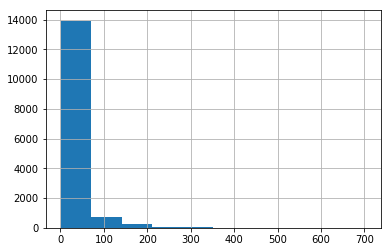

In [51]:
artistwordBag.drop_duplicates(subset = 'wordBag').artist.value_counts().hist()